In [3]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv("bmi_train.csv")


In [5]:
data.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [6]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [7]:
data.shape

(400, 4)

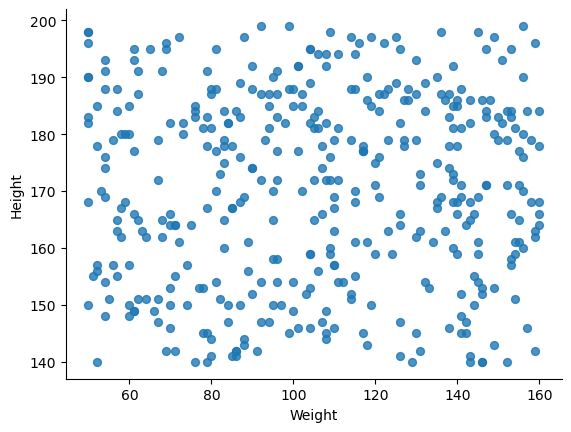

In [8]:
# Scatter plot
data.plot(kind='scatter', x="Weight", y="Height", s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
#checking if there is missing data
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [10]:
#Creating x and y values: X being the indepedent variable and y being the dependant variable

x=data[["Weight"]]
y=data[["Height"]]

In [11]:
#creating the model
model=linear_model.LinearRegression()


In [12]:
#splitting the data into 70% training and 30% testing
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [13]:
#training the model

model.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(x_test)

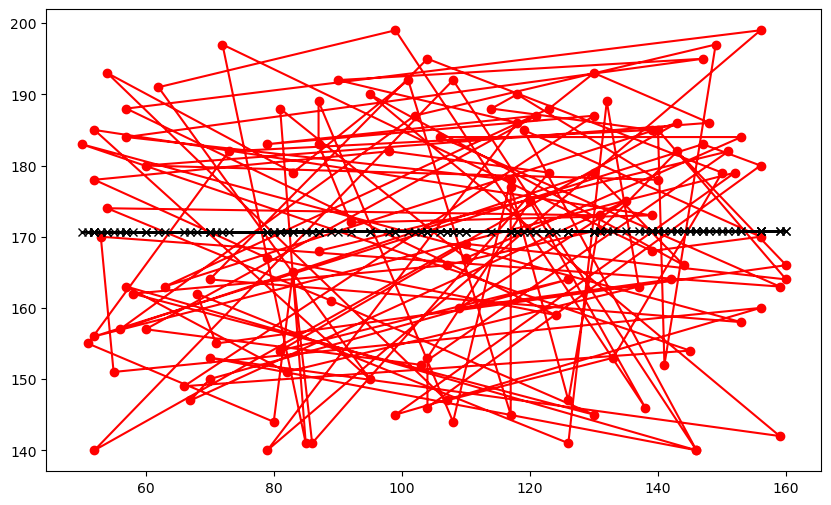

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Values', color='red', marker='o')

# Plot predicted values
plt.plot(x_test, y_pred, label='Predicted Values', color='black', marker='x')


In [18]:
model.intercept_

array([170.53688428])

In [19]:
model.coef_

array([[0.00150829]])

In [20]:
predicted_weigtht= model.predict([[5]])
print(predicted_weigtht)

[[170.54442571]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean squared error")
print(mean_squared_error(y_test,y_pred))
print("R_squared")
print(r2_score(y_test,y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test,y_pred))

Mean squared error
287.818024188379
R_squared
-0.0037488916017187623
Mean absolute error
14.839415662129273


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
df_cleaned=pd.read_csv("drug200.csv")

In [34]:
#Displaying a few rows
df_cleaned.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [35]:
#Seperating the x and the y variables and converting them to numpy array
X=df_cleaned.drop(columns=["Na_to_K","Age"])
y=df_cleaned['Na_to_K']
X=X.to_numpy()
y=y.to_numpy()

In [36]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
model=LogisticRegression()

In [30]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'F'

In [38]:
data["Na_to_K"]=pd.to_numeric(data["Na_to_K"],errors='coerce')
df_cleaned=data.dropna(subset="Na_to_K")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [39]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define categorical and numerical columns
categorical_cols = ['diarrhea_status', 'residence', 'Sex', 'age_category', 'education', 'wealth_index']
numerical_cols = ['Child participated in POLIO campaign August 2013', 'weight', 'height', 'age']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standard scaling for numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encoding for categorical columns
    ]
)